In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_excel(io = '/home/gautham/Documents/XLSs/nyc_benchmarking_disclosure_2017_consumption_data.xlsx', sheet_name = 'Information and Metrics')

In [3]:
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,...,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,...,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,...,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,...,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,...,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
Order                                                         34355 non-null int64
Property Id                                                   34355 non-null int64
Property Name                                                 34355 non-null object
Parent Property Id                                            1723 non-null object
Parent Property Name                                          1723 non-null object
BBL - 10 digits                                               33625 non-null float64
NYC Borough, Block and Lot (BBL) self-reported                33626 non-null object
NYC Building Identification Number (BIN)                      33123 non-null object
Address 1 (self-reported)                                     34355 non-null object
Address 2 (self-reported)                                     427 non-null object
Postal Code                                             

In [5]:
for col in data.columns:
    if 'ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col:
        print(data[col].unique())
        print(data[col].nunique())

['Not found']
1
[169416  94380 125000 ...  38117  51960  32350]
16666
[164754.  94380. 125000. ...  38117.  51960.  32350.]
16699
[ 4662.    nan 28006. ...  3059.  5377. 11661.]
2787
[  nan 9134. 4455. ... 1782. 2879. 1989.]
1149
[ 90. 100.  83.  27.  99.  nan  37.  97.  94.  72.  76.  64.  89.  95.
  59.  52.  70.  30.  88.  91.   4.  39.  32.   1.  26.  96.  82.   3.
  86.  98.  87.   7.  65.  45.  80.  93.  79.  81.  75.  46.  67.  73.
   8.  19.  50.  16.  18.  49.  53.  23.   6.  58.  12.  47.   2.  55.
  41.  66.  74.  36.  63.  10.  85.   5.  69.  22.  77.  33.  61.  57.
  14.  42.  20.  38.  60.  35.  92.  43.  68.  84.  71.  24.  78.   9.
  44.  48.  21.  15.  40.  28.  56.  54.  62.  29.  17.  13.  51.  34.
  11.  31.  25.]
100
[138.4  43.5 271.1 ... 298.6 411.4 266.9]
3982
[141.   46.8 274.7 ... 308.2 306.  235.9]
3917
[ 53.8  28.4 130.2 ... 206.5 152.4 242.9]
2604
[ 56.2  31.3 133.7 ... 153.4 254.7 206.3]
2602
[1.130000e+01 2.000000e+00 1.880000e+01 1.170000e+01 6.000000e+0

In [6]:
data = data.replace({'Not found': np.nan})

In [7]:
for col in data.columns:
    if 'ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col:
            data[col] = data[col].astype(float)

In [8]:
def missing_values_table(data):
    mis_values = data.isnull().sum()
    
    mis_values_percent = (mis_values / len(data)) * 100
    
    mis_val_table = pd.concat([mis_values, mis_values_percent], axis = 1)
    
    mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : 'Missing Values Percentage'})
    
#     mis_val_table = mis_val_table[mis_val_table.iloc[:,1].sort_values('Missing Values Percentage', ascending = False)].round(1)
    
    mis_val_table = mis_val_table.sort_values('Missing Values Percentage', ascending = False).round(1)
    
    return mis_val_table

In [9]:
missing_values = missing_values_table(data)

In [10]:
considerable_missing_values = missing_values[missing_values['Missing Values Percentage'] > 50].index

In [11]:
data = data.drop(columns = considerable_missing_values)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 36 columns):
Order                                                         34355 non-null int64
Property Id                                                   34355 non-null int64
Property Name                                                 34355 non-null object
BBL - 10 digits                                               33625 non-null float64
NYC Borough, Block and Lot (BBL) self-reported                33626 non-null object
NYC Building Identification Number (BIN)                      33123 non-null object
Address 1 (self-reported)                                     34355 non-null object
Postal Code                                                   34355 non-null object
Borough                                                       34355 non-null object
Self-Reported Gross Floor Area (ft²)                          34355 non-null float64
Primary Property Type - Self Selected              

Text(0.5, 1.0, 'Energy Star Score Distribution')

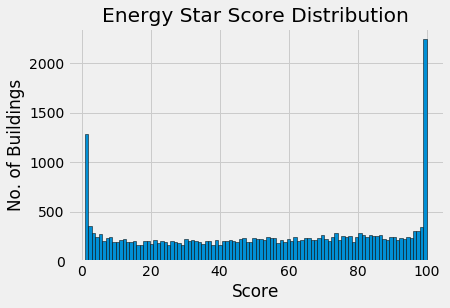

In [13]:
plt.style.use('fivethirtyeight')
plt.hist(data['ENERGY STAR Score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('No. of Buildings')
plt.title('Energy Star Score Distribution')

Text(0.5, 1.0, 'Site EUI Distribution')

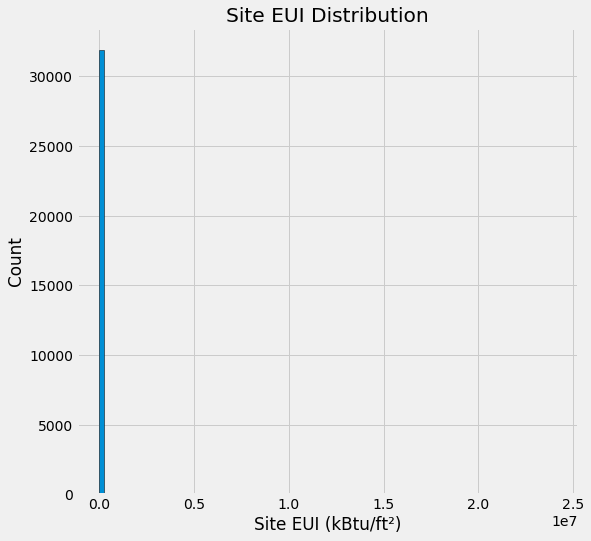

In [14]:
plt.figure(figsize = (8, 8))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Site EUI (kBtu/ft²)')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [15]:
data['Site EUI (kBtu/ft²)'].describe().round(2)

count       31888.00
mean          992.26
std        134994.82
min             0.00
25%            58.00
50%            79.90
75%           103.40
max      24058060.00
Name: Site EUI (kBtu/ft²), dtype: float64

In [16]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

6613       143221.0
6606       143221.0
25533      206060.4
5295       252180.7
5289       252180.7
9244       252180.7
4584       252180.7
17884      328065.6
17883     1340295.0
20192    24058060.0
Name: Site EUI (kBtu/ft²), dtype: float64

*In the above result, the first column is the Index of each row which is "order" and the second column is what that is showing the required column value*

In [17]:
data.loc[data['Site EUI (kBtu/ft²)'] == 24058060.0]

,Order,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Borough,Self-Reported Gross Floor Area (ft²),...,Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Generation Date
20192,20406,5820492,65 broadway llc,1.000210e+09,1-00021-0004,1000809,65 broadway,10006,Manhattan,335184.0,...,NaN,23157732.2,6787142.2,6830963.1,535429700.0,0.0,535429700.0,NaN,NaN,2018-12-09


### Removing Outliers

In [18]:
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']

In [19]:
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

In [20]:
third_quartile

103.4

Interquartile Range

In [21]:
iqr = third_quartile - first_quartile

In [22]:
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) & (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

Text(0.5, 1.0, 'Site EUI Distribution')

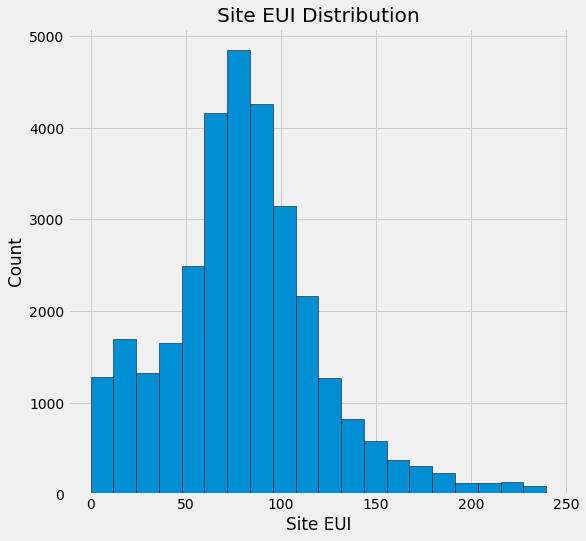

In [23]:
plt.figure(figsize = (8,8))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'k')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [24]:
types = data.dropna(subset = ['ENERGY STAR Score'])

In [25]:
types = types['Largest Property Use Type'].value_counts()

In [26]:
types = types[types.values > 100].index

In [27]:
types

Index(['Multifamily Housing', 'Office', 'K-12 School', 'Hotel',
       'Residence Hall/Dormitory', 'Non-Refrigerated Warehouse',
       'Retail Store', 'Senior Care Community', 'Distribution Center',
       'Worship Facility'],
      dtype='object')

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Building Type')

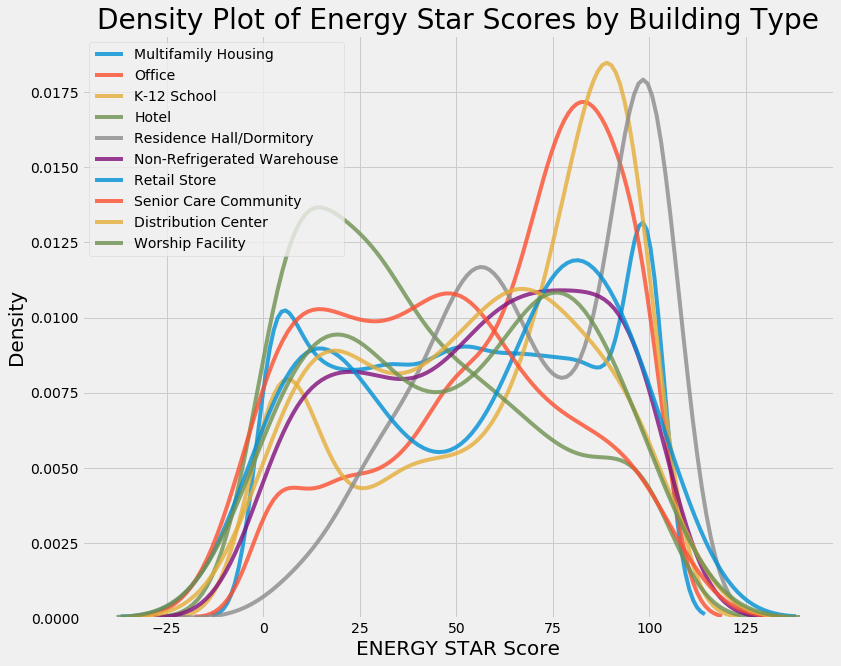

In [28]:
plt.figure(figsize = (12,10))

for b_type in types:
    subset = data[data['Largest Property Use Type'] == b_type]
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = b_type, shade = False, alpha = 0.8)

plt.xlabel('ENERGY STAR Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28)

In [29]:
borough = data.dropna(subset = ['ENERGY STAR Score'])

In [30]:
borough = borough['Borough'].value_counts()

In [31]:
borough = borough[borough.values > 100].index

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Borough')

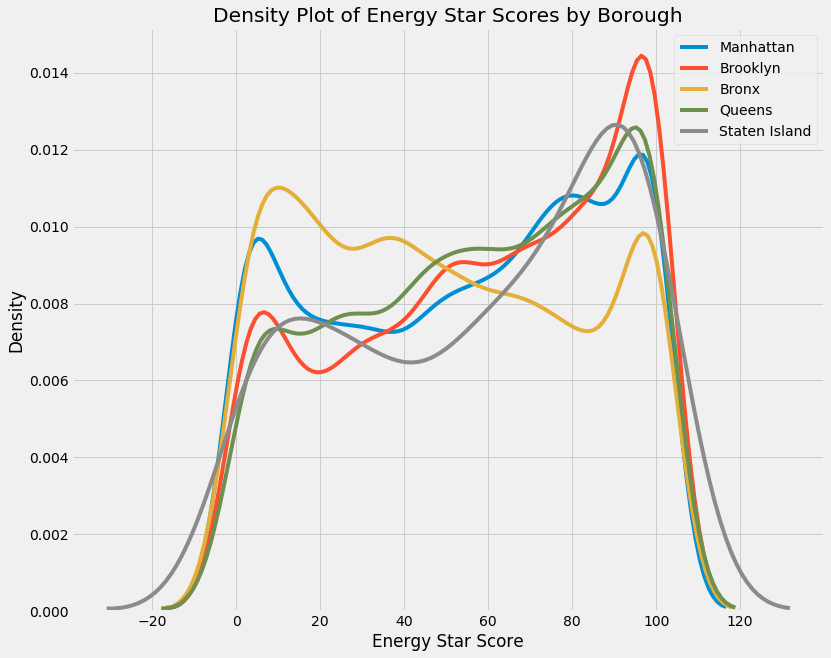

In [32]:
plt.figure(figsize = (12, 10))

for each_borough in borough:
    subset = data[data['Borough'] == each_borough]
    
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = each_borough)

plt.xlabel('Energy Star Score')
plt.ylabel('Density')
plt.title('Density Plot of Energy Star Scores by Borough')

In [33]:
correlation_data = data.corr()['ENERGY STAR Score'].sort_values()

In [34]:
correlation_data.head(15)

Site EUI (kBtu/ft²)                                          -0.764947
Weather Normalized Site EUI (kBtu/ft²)                       -0.759865
Weather Normalized Source EUI (kBtu/ft²)                     -0.676350
Source EUI (kBtu/ft²)                                        -0.664716
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.477838
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.349015
Property Id                                                  -0.138856
Order                                                        -0.098902
Direct GHG Emissions (Metric Tons CO2e)                      -0.094196
Weather Normalized Site Natural Gas Use (therms)             -0.080714
Natural Gas Use (kBtu)                                       -0.079888
Total GHG Emissions (Metric Tons CO2e)                       -0.068426
Occupancy                                                    -0.048963
Electricity Use - Grid Purchase (kWh)                        -0.018676
Electr

In [35]:
correlation_data.tail(15)

Natural Gas Use (kBtu)                               -0.079888
Total GHG Emissions (Metric Tons CO2e)               -0.068426
Occupancy                                            -0.048963
Electricity Use - Grid Purchase (kWh)                -0.018676
Electricity Use - Grid Purchase (kBtu)               -0.018676
Weather Normalized Site Electricity (kWh)            -0.017196
Indirect GHG Emissions (Metric Tons CO2e)            -0.016657
Number of Buildings                                  -0.013756
Water Use Intensity (All Water Sources) (gal/ft²)    -0.001286
Year Built                                           -0.001119
Water Use (All Water Sources) (kgal)                  0.000583
BBL - 10 digits                                       0.054764
Self-Reported Gross Floor Area (ft²)                  0.066285
Largest Property Use Type - Gross Floor Area (ft²)    0.068612
ENERGY STAR Score                                     1.000000
Name: ENERGY STAR Score, dtype: float64

In [36]:
numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'ENERGY STAR Score':
        next
    else:
        numeric_subset['sqrt_'+col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_'+col] = np.log(numeric_subset[col])

categorical_subset = data[['Borough','Largest Property Use Type']]

categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset,categorical_subset], axis = 1)

features = features.dropna(subset = ['ENERGY STAR Score'])

correlations = features.corr()['ENERGY STAR Score'].dropna().sort_values()

/home/gautham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/gautham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/gautham/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gautham/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:

In [37]:
correlations.head(15)

Site EUI (kBtu/ft²)                                               -0.764947
Weather Normalized Site EUI (kBtu/ft²)                            -0.759865
sqrt_Site EUI (kBtu/ft²)                                          -0.754405
sqrt_Weather Normalized Site EUI (kBtu/ft²)                       -0.748839
sqrt_Weather Normalized Source EUI (kBtu/ft²)                     -0.716912
sqrt_Source EUI (kBtu/ft²)                                        -0.709354
Weather Normalized Source EUI (kBtu/ft²)                          -0.676350
Source EUI (kBtu/ft²)                                             -0.664716
log_Site EUI (kBtu/ft²)                                           -0.663572
log_Weather Normalized Site EUI (kBtu/ft²)                        -0.657328
log_Weather Normalized Source EUI (kBtu/ft²)                      -0.650812
log_Source EUI (kBtu/ft²)                                         -0.648899
Weather Normalized Site Natural Gas Intensity (therms/ft²)        -0.477838
sqrt_Weather

In [38]:
correlations.tail(15)

log_BBL - 10 digits                                                0.037525
Largest Property Use Type_Hospital (General Medical & Surgical)    0.044757
sqrt_BBL - 10 digits                                               0.049665
BBL - 10 digits                                                    0.054764
Largest Property Use Type_K-12 School                              0.058834
Self-Reported Gross Floor Area (ft²)                               0.066285
Borough_Brooklyn                                                   0.066885
Largest Property Use Type_Residence Hall/Dormitory                 0.067337
Largest Property Use Type - Gross Floor Area (ft²)                 0.068612
Largest Property Use Type_Office                                   0.097753
sqrt_Self-Reported Gross Floor Area (ft²)                          0.104654
sqrt_Largest Property Use Type - Gross Floor Area (ft²)            0.108566
log_Self-Reported Gross Floor Area (ft²)                           0.133142
log_Largest 

/home/gautham/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Energy Star Score vs Site EUI (kBtu/ft²)')

<Figure size 864x576 with 0 Axes>

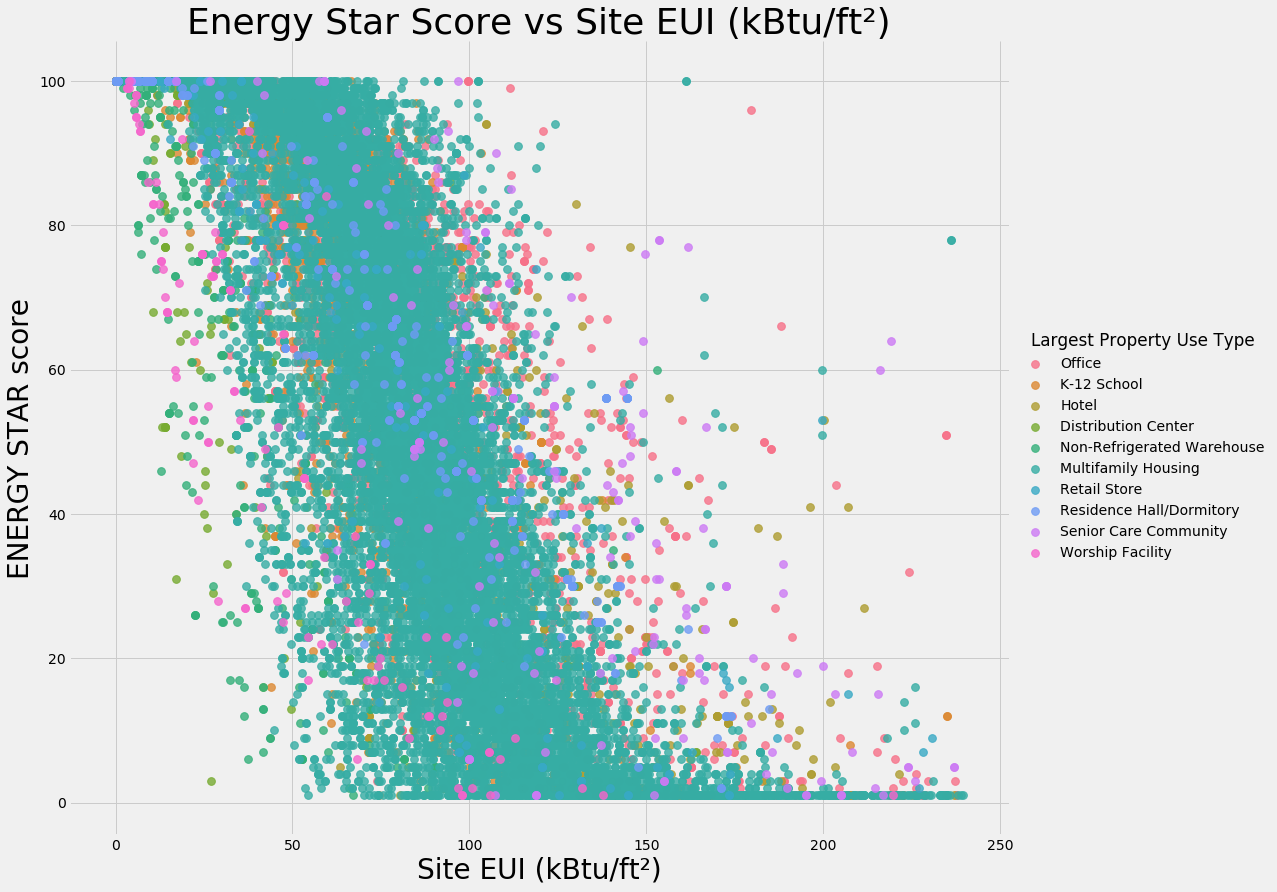

In [39]:
plt.figure(figsize=(12,8))

features['Largest Property Use Type'] = data.dropna(subset=['ENERGY STAR Score'])['Largest Property Use Type']

features = features[features['Largest Property Use Type'].isin(types)]

sns.lmplot('Site EUI (kBtu/ft²)', 'ENERGY STAR Score', hue = 'Largest Property Use Type', data=features, scatter_kws={'alpha':0.8, 's':60}, fit_reg=False, size=12, aspect=1.2)

plt.xlabel('Site EUI (kBtu/ft²)', size = 28)

plt.ylabel('ENERGY STAR score', size = 28)

plt.title('Energy Star Score vs Site EUI (kBtu/ft²)', size = 36)

In [40]:
for i in features.columns:
    print(i)

Order
Property Id
BBL - 10 digits
Self-Reported Gross Floor Area (ft²)
Largest Property Use Type - Gross Floor Area (ft²)
Year Built
Number of Buildings
Occupancy
ENERGY STAR Score
Source EUI (kBtu/ft²)
Weather Normalized Source EUI (kBtu/ft²)
Site EUI (kBtu/ft²)
Weather Normalized Site EUI (kBtu/ft²)
Weather Normalized Site Electricity Intensity (kWh/ft²)
Weather Normalized Site Natural Gas Intensity (therms/ft²)
Natural Gas Use (kBtu)
Weather Normalized Site Natural Gas Use (therms)
Electricity Use - Grid Purchase (kBtu)
Electricity Use - Grid Purchase (kWh)
Weather Normalized Site Electricity (kWh)
Total GHG Emissions (Metric Tons CO2e)
Direct GHG Emissions (Metric Tons CO2e)
Indirect GHG Emissions (Metric Tons CO2e)
Water Use (All Water Sources) (kgal)
Water Use Intensity (All Water Sources) (gal/ft²)
sqrt_Order
log_Order
sqrt_Property Id
log_Property Id
sqrt_BBL - 10 digits
log_BBL - 10 digits
sqrt_Self-Reported Gross Floor Area (ft²)
log_Self-Reported Gross Floor Area (ft²)
sqrt_

Text(0.5, 1.02, 'Pair Plots of Energy Data')

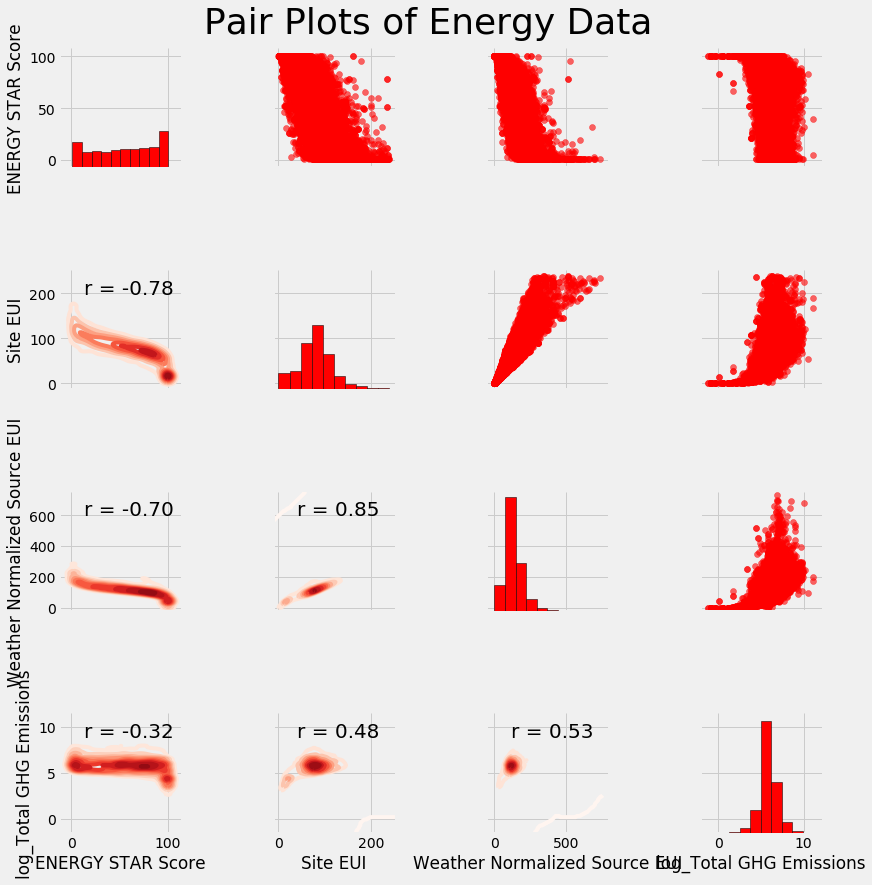

In [43]:
plot_data = features[['ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
                     'Weather Normalized Source EUI (kBtu/ft²)',
                     'log_Total GHG Emissions (Metric Tons CO2e)']]

plot_data = plot_data.replace({np.inf:np.nan, -np.inf:np.nan})

plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)':'Site EUI',
                              'Weather Normalized Source EUI (kBtu/ft²)':'Weather Normalized Source EUI',
                             'log_Total GHG Emissions (Metric Tons CO2e)':'log_Total GHG Emissions'})

plot_data = plot_data.dropna()

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy = (.2, .8), xycoords = ax.transAxes, size = 20)


grid = sns.PairGrid(data = plot_data, height = 3)

grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

grid.map_lower(corr_func);

grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

plt.suptitle('Pair Plots of Energy Data', size = 36, y = 1.02)
